In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from wordcloud import WordCloud
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


In [5]:
df=pd.read_csv('/content/Twitter.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
df.shape

(31962, 3)

In [8]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
df['label'].value_counts()

,count
label,
0,29720
1,2242


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
def clean_tweets(input_tweet):
  clean_tweet=re.sub("@[\w]*","",input_tweet)
  clean_tweet=re.sub("[^a-zA-Z#]"," ",clean_tweet)
  clean_tweet=clean_tweet.lower()
  stop_words=stopwords.words('english')
  tweet_tokenizer=TweetTokenizer()
  stemmer=PorterStemmer()
  tweet_tokens=tweet_tokenizer.tokenize(clean_tweet)
  tweet_tokens=[i for i in tweet_tokens if i not in stop_words]
  tweet_tokens=[i for i in tweet_tokens if len(i)>3]
  tweet_tokens=[i if i.startswith("#") else stemmer.stem(i) for i in tweet_tokens]
  return " ".join(tweet_tokens)
df['clean_tweet']=df['tweet'].apply(lambda i : clean_tweets(i))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguid societi #motivation


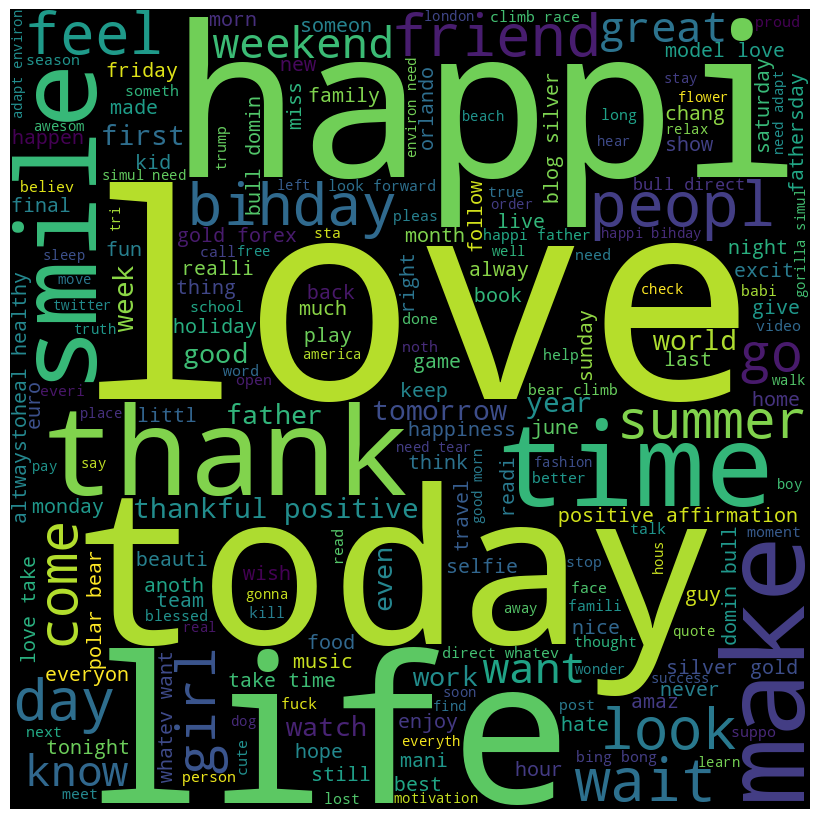

In [61]:
all_positive_tweets_token=" ".join([i for i in df[df['label']==0]['clean_tweet']])
wordcloud=WordCloud(width=800,height=800,
                    background_color='black',
                    min_font_size=10).generate(all_positive_tweets_token.replace("#",""))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


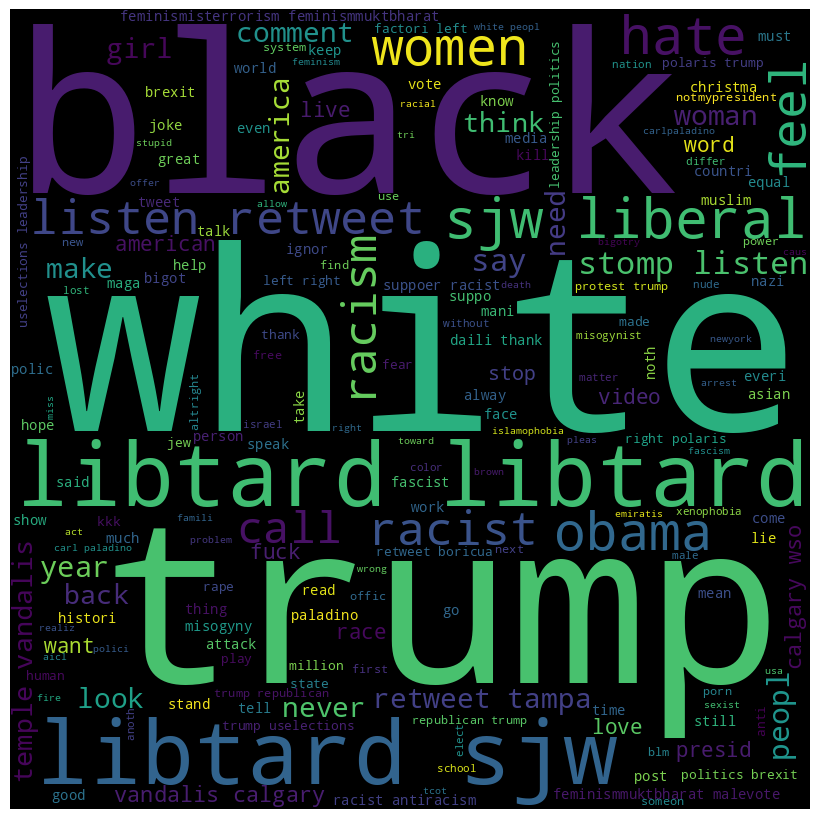

In [27]:
all_negative_tweets_token="".join([i for i in df[df['label']==1]['clean_tweet']])
wordcloud=WordCloud(width=800,height=800,
                    background_color='black',
                    min_font_size=10).generate(all_negative_tweets_token.replace("#",""))
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<Axes: xlabel='count', ylabel='Hashtags'>

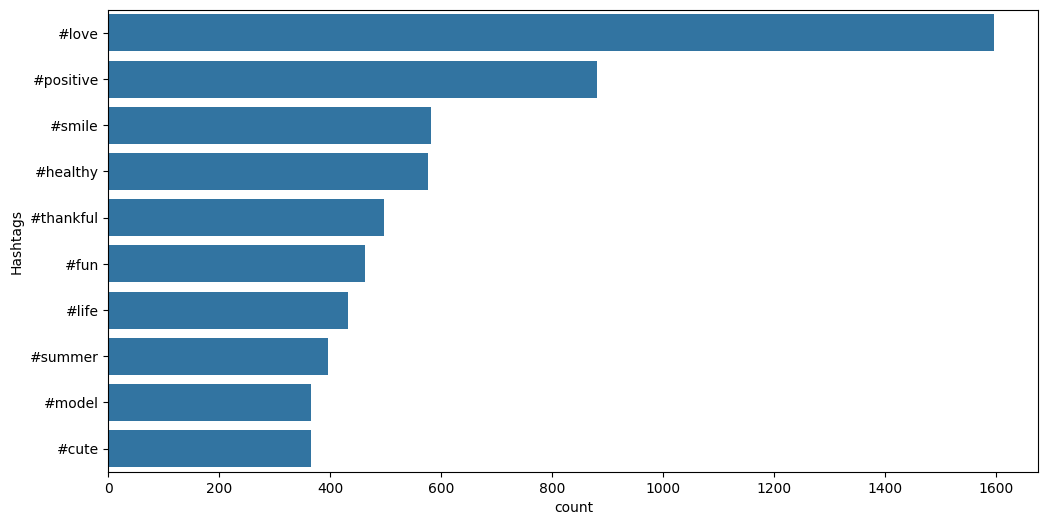

In [30]:
positive_hastags=[i for i in all_positive_tweets_token.split() if i.startswith("#")]
positive_hastags_count={}
for hashtag in positive_hastags:
  try:
    positive_hastags_count[hashtag] += 1
  except:
    positive_hastags_count[hashtag] =1
positive_hastags_count=pd.DataFrame({'Hashtags':list(positive_hastags_count.keys()),'count':list(positive_hastags_count.values())})
plt.figure(figsize=(12,6))
sns.barplot(data=positive_hastags_count.nlargest(10,columns="count"),y='Hashtags',x='count')


<Axes: xlabel='Count', ylabel='Hashtags'>

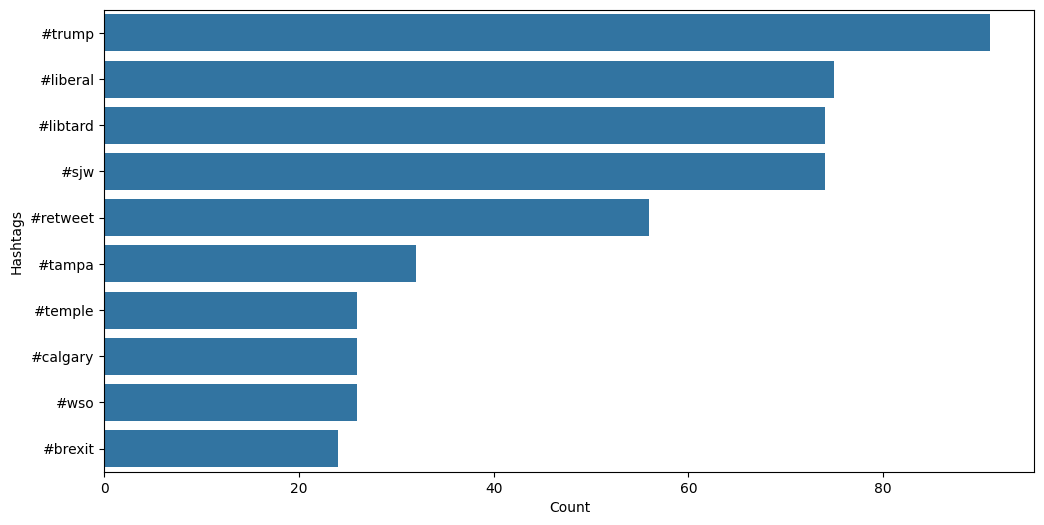

In [36]:
negative_hastags=[i for i in all_negative_tweets_token.split() if i.startswith("#")]
negative_hastags_count={}
for hashtag in negative_hastags:
  try:
    negative_hastags_count[hashtag] +=1
  except:
    negative_hastags_count[hashtag]=1
negative_hastags_count=pd.DataFrame({'Hashtags':list(negative_hastags_count.keys()),'Count': list(negative_hastags_count.values())})
plt.figure(figsize=(12,6))
sns.barplot(data=negative_hastags_count.nlargest(10,columns="Count"),y='Hashtags',x='Count')

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
bow_vectorizer=CountVectorizer()
df_bow=bow_vectorizer.fit_transform(df['clean_tweet'])


In [52]:
x_train,x_test,y_train,y_test=train_test_split(df_bow,df['label'],test_size=0.2,random_state=42)


In [53]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
pred=model.predict(x_test)
f1_score(y_test,pred)

0.6291208791208791

In [55]:
accuracy_score(y_test,pred)

0.9577663068981699

In [58]:
#use probability to get output
pred_prob= model.predict_proba(x_test)
pred=pred_prob[:,1]>=0.3
pred=pred.astype(np.int64)
f1_score(y_test,pred)


0.6834532374100719

In [59]:
accuracy_score(y_test,pred)

0.9587048334115439

In [60]:
pred_prob[0][1]>=0.3


False